In [1]:
import pdb
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def drawPoints(img, pts):
    for k in range(pts.shape[1]):
        cv2.drawMarker(img, (np.asarray(pts[0,k]), np.asarray(pts[1,k])), (255, 0, 0), markerType=cv2.MARKER_STAR,
                       markerSize=10, thickness=2, line_type=cv2.LINE_AA)
    return img

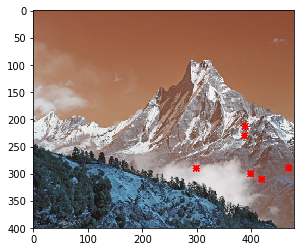

In [3]:
im = cv2.imread('fishtail2.jpg')
imgplot = plt.imshow(drawPoints(im[0:400,0:480],np.asarray([[400,420,389,300,470,390],[300,310,230,290,289,213],[1,1,1,1,1,1]])))

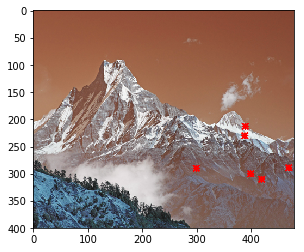

In [4]:
im = cv2.imread('fishtail2.jpg')
imgplot = plt.imshow(drawPoints(im[0:400,160:640],np.asarray([[400,420,389,300,470,390],[300,310,230,290,289,213],[1,1,1,1,1,1]])))

In [11]:
def prepare_data():
    im = cv2.imread('fishtail2.jpg')
    print(im.__class__.__name__)
    print(im.shape)
    center = (im.shape[0]/2,im.shape[1]/2)
    scale = 1
    angle = 4
    im1 = im[0:400,0:480]
    im2 = im[0:400,160:640]

    rot_mat = cv2.getRotationMatrix2D(center, angle, scale)
    warped_im2 = cv2.warpAffine(im2,rot_mat,(480,400))

    p1 = np.asarray([[400,420,389,300,470,390],[300,310,230,290,289,213],[1,1,1,1,1,1]])
    p1_cr = np.asarray([[160],[0],[0]])
    p2 = np.dot(rot_mat,p1-p1_cr)
    im1_pts = im1
    imgplot = plt.imshow(drawPoints(im1_pts, p1))
    #im1_pts = drawPoints(im1_pts, p1)
    #cv2.imshow("im1_pts",im1_pts)
    #cv2.waitKey(0)
    return im1, warped_im2, p1, p2

ndarray
(400, 640, 3)


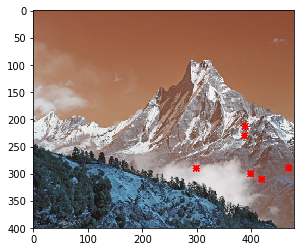

In [12]:
im1, im2, p1, p2 = prepare_data()

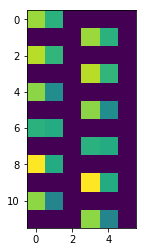

In [13]:
A = np.tile(np.repeat(p1.transpose(),2,0),(1,2))
A[0::2,3:]= 0
A[1::2,:3]= 0
imgplot = plt.imshow(A)

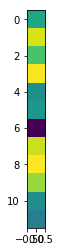

In [15]:
bmat = np.zeros((p2.shape[1]*2,1))
bmat[0::2,:] = np.reshape(p2[0].transpose(),(-1,1))
bmat[1::2,:] = np.reshape(p2[1].transpose(),(-1,1))
imgplot = plt.imshow(bmat)

In [17]:
Ax = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.transpose(A)), bmat)
Ax = np.linalg.lstsq(A, bmat, rcond=None)

In [18]:
Aff_mat = np.reshape(Ax[0],(2,3))
p2_check = np.dot(Aff_mat,p1)

In [ ]:
'''
    a11*x1 + a12*y1 + a13*z1 = x2
    a21*x1 + a22*y1 + a23*z1 = y2
'''
'''
    x1*a11 + y1*a12 + 1*a13 + 0 *a21 + 0 *a22 + 1*a23 = x2
     0*a11 + 0* a12 + 0*a23 + x1*a21 + y1*a22 + 1*a23 = y2
'''

In [19]:
height = 480
width = 640
blank_image2 = np.zeros((height,width,3), np.uint8)

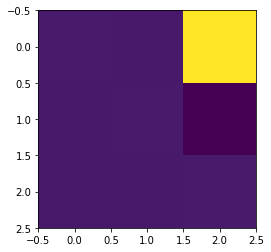

In [20]:
invAffmat = np.linalg.inv(np.vstack((Aff_mat,np.asarray([0,0,1])))) #inverse
imgplot = plt.imshow(invAffmat)

In [21]:
blank_image = cv2.warpAffine(im2,invAffmat[0:2,:],(width,height))#copy location of the pixel values by inverse matrix
blank_image2[0:im1.shape[0],0:im1.shape[1],:] = im1 #copy to initialize another copy

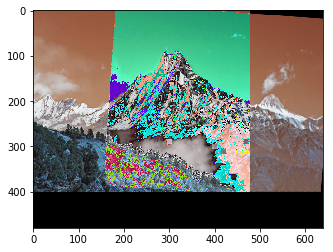

In [25]:
final_image = blank_image+ blank_image2 #the part common is added twice with the addition
imgplot = plt.imshow(final_image)

In [26]:
final_image = np.maximum(blank_image,blank_image2) #take values unique so above does not appear like common one

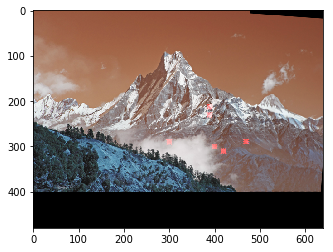

In [27]:
imgplot = plt.imshow(final_image)

In [ ]:
cv2.imshow("final_image", final_image)
cv2.waitKey(0)